## 신경망과 딥러닝
# 케라스 MNIST

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.4.0'

### MNIST 불러오기
- C:\Users\\[사용자아이디]\\.keras\datasets\mnist.npz 에 저장됨

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train.max(), X_train.min(), X_train.dtype

(255, 0, dtype('uint8'))

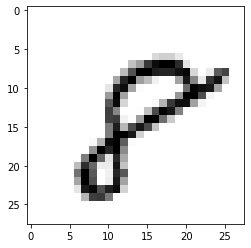

In [7]:
plt.imshow(X_train[-1], cmap='gray_r')

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 데이터 전처리
- 이미지를 1차원으로 풀고, 최대값이 1이 되게 실수값으로 바꾼다
- 목표값을 원핫인코딩으로 바꾼다

In [10]:
X_train = X_train.reshape(60000,28*28)/255.
X_test = X_test.reshape(-1,28*28)/255.

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [13]:
np.eye(5)[[2,4]]

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [14]:
from keras.utils import to_categorical

In [15]:
to_categorical([4,0,3,1,2])

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [16]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values
#y_train = to_categorical(y_train)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [17]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### MNIST 신경망 구조

<img src='https://mmlind.github.io/images/1lnn_input.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)
> 그림에서 픽셀 갯수가 잘못 표기됨 (784가 맞음)

<img src='https://mmlind.github.io/images/1lnn_nnlayer.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 픽셀 수가 784 이므로 속성 갯수가 784인 경우이다.
- w1, w2, w3, ..., w784, b
- w1\*x1 + w2\*x2 + ... + w784\*x784 + b

<img src='https://mmlind.github.io/images/1lnn.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 타겟 클래스가 10개이므로, 가중치와 절편이 그 만큼 늘어난다.
- 클래스값 0 => w1_1, w2_1, ..., w784_1, b1
- 클래스값 1 -> w1_2, w2_2, ..., w784_2, b2
- 가중치갯수 = 784\*10, 절편갯수 = 10

<img src='https://mmlind.github.io/images/1lnn_full.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

### 비용함수
- 위와 같은 결과를 얻었을 때, 손실값을 어떻게 계산할까?
- mse = (0.003126 - 0)^2 + ... + (0.682134 - 1)^2 + ...
- 위와 같이 mse 를 적용할 수 있다.
- 하지만, 이런 멀티 클래스의 경우에는 다른 손실값을 적용하는 것이 일반적이다.
- 위 그림은 숫자 6을 판별한 것이다. 그러므로 결과값은 6 위치만 값이 1이다.
> cross\_entropy\_i = -log(0.682134), 입력 이미지 1개에 대한 손실값
- 모든 숫자 이미지에 대한 크로스엔트로피를 평균한 것이 최종값이다.
> $ cross\_entropy = {1 \over N} \sum_{i=0}^{N-1} {-log(cross\_entropy\_i)} $

### 활성화함수 (소프트맥스)
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6QRL4yW5p4j634dzSyjZWMWWCGXaU_MZVnqDq_HErnH5RCCIizQ' />
(출처 : https://www.google.com/search?tbm=isch&sa=1&ei=VFNCXfrICcybmAWZw6_ACQ&q=mnist+softmax&oq=mnist+softmax&gs_l=img.3..0i24l3.528.3330..3872...0.0..1.585.3193.0j1j5j2j1j1......0....1..gws-wiz-img.uKr_Bjki0oA&ved=0ahUKEwj6wvvf1ODjAhXMDaYKHZnhC5gQ4dUDCAY&uact=5#imgrc=Bwc55tfbS2SjXM:)

- 실제로는 위와 같이 마지막 출력값을 내기 전에 softmax 라는 함수를 적용하여 출력값을 바꾸어 준다.

<img src='https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg' />
(출처: https://www.youtube.com/watch?v=lvNdl7yg4Pg)

- 출력값이 [2,1,0.1] 일때, 각각에 exponential 지수를 적용한 값의 비율을 구한 것이 softmax 이다.
- softmax 를 적용하면 최종 출력값을 모두 더하면 1이 된다. (즉 확률 개념이 된다.)

<img src='mnist_nn.jpg' />
(출처: http://users.jyu.fi/~olkhriye/ties4911/lectures/Lecture03.pdf )<br>
<img src='https://image.slidesharecdn.com/tensorflowppt-160408142819/95/tensorflow-5-638.jpg?cb=1460125744' />
(출처: https://www.slideshare.net/jirimaterna/tensorflow-60661959 )

### 단층 신경망 (로지스틱 회귀)
- 입력층 : 이미지
- 중간층 : 없음
- 출력층 : 뉴런 10개
- 출력층 활성화함수 : 소프트맥스
- 비용함수 : 크로스엔트로피
> $$ cross\_entropy = - \frac{1}{N} \sum_i y_i \cdot log(\hat{y}_i) $$

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

In [19]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6653 - acc: 0.8300
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3000 - acc: 0.9169
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808 - acc: 0.9217
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2790 - acc: 0.9242
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2770 - acc: 0.9255
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - acc: 0.9293
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2774 - acc: 0.9284
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2791 - acc: 0.9280
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2834 - acc: 0.9280
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2780 - acc: 0.9294
Epoch 11/100
1875/1

1875/1875 [==============================] - 12s 6ms/step - loss: 0.2938 - acc: 0.9366
Epoch 83/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2966 - acc: 0.9351
Epoch 84/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2907 - acc: 0.9356: 0s - loss: 0.2904 - a
Epoch 85/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2918 - acc: 0.9361
Epoch 86/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3042 - acc: 0.9356
Epoch 87/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2992 - acc: 0.9348
Epoch 88/100
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2971 - acc: 0.9347
Epoch 89/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2866 - acc: 0.9364
Epoch 90/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2935 - acc: 0.9360
Epoch 91/100
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2908 - ac

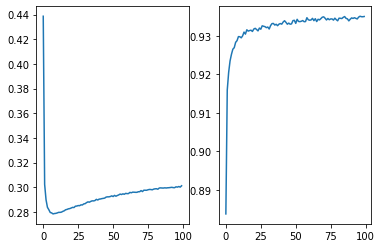

In [21]:
plt.subplot(1,2,1)
plt.plot(model.history.history['loss'])

plt.subplot(1,2,2)
plt.plot(model.history.history['acc'])

In [23]:
pred_y = model.predict(X_train)
pred_y

array([[9.7426202e-08, 1.2125748e-10, 2.3867876e-06, ..., 2.4861608e-12,
        8.9258826e-08, 7.6937283e-11],
       [1.0000000e+00, 1.3923294e-23, 1.1778557e-09, ..., 3.6426055e-20,
        7.8149054e-10, 2.3886858e-14],
       [5.5130572e-10, 2.3519273e-05, 5.7186862e-05, ..., 4.5121487e-06,
        6.3810478e-11, 1.1546011e-07],
       ...,
       [1.3233804e-08, 1.4130659e-05, 1.2430235e-11, ..., 4.6332361e-17,
        6.4466812e-04, 4.0465220e-15],
       [1.5532561e-07, 9.0314842e-17, 6.9704811e-08, ..., 7.7199772e-08,
        2.7645400e-11, 1.0030172e-09],
       [7.1960822e-04, 3.6493669e-14, 5.7804574e-09, ..., 3.6422293e-08,
        9.7480756e-01, 1.0116663e-06]], dtype=float32)

In [24]:
(pred_y.argmax(axis=1)==y_train.argmax(axis=1)).mean()

0.9359833333333333

In [25]:
pred_y = model.predict(X_test)
pred_y

array([[1.1576792e-11, 1.1278143e-21, 2.2905538e-12, ..., 9.9998808e-01,
        2.4249535e-11, 1.1085776e-05],
       [7.6209449e-07, 2.6075053e-08, 9.9999344e-01, ..., 0.0000000e+00,
        3.4508922e-16, 1.8060026e-36],
       [1.6197106e-12, 9.9845195e-01, 1.2023184e-03, ..., 1.0266540e-09,
        1.8620795e-04, 6.9398318e-09],
       ...,
       [4.8460504e-15, 3.7459176e-18, 2.0124844e-12, ..., 8.9142873e-04,
        3.9854860e-03, 3.9454173e-02],
       [1.4868701e-17, 2.1184849e-15, 9.1776888e-18, ..., 1.2551224e-15,
        8.7399199e-04, 2.5224596e-16],
       [1.7858246e-14, 3.6870761e-35, 1.0483525e-12, ..., 2.8317020e-23,
        4.0157737e-19, 4.8951325e-23]], dtype=float32)

In [31]:
pred_y[0]

array([1.1576792e-11, 1.1278143e-21, 2.2905538e-12, 8.4671666e-07,
       5.4157594e-12, 2.9026591e-08, 5.6725571e-17, 9.9998808e-01,
       2.4249535e-11, 1.1085776e-05], dtype=float32)

In [26]:
(pred_y.argmax(axis=1)==y_test.argmax(axis=1)).mean()

0.9258

In [32]:
ws = model.get_weights()
type(ws), len(ws)

(list, 2)

In [19]:
ws[0].shape, ws[1].shape

((784, 10), (10,))

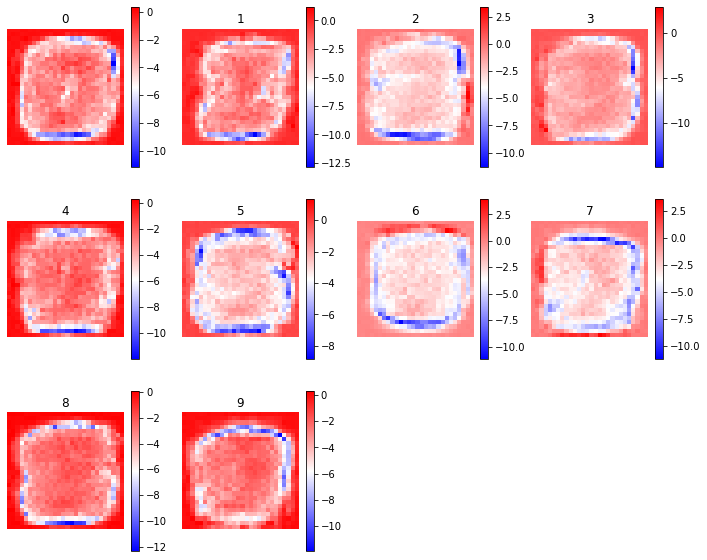

In [20]:
plt.figure(figsize=[12,10])

for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(ws[0][:,i].reshape(28,28), cmap='bwr')
    plt.axis('off')
    plt.title(i)
    plt.colorbar()

### 중간층 추가

In [36]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [42]:
48000/128

375.0

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
              metrics=['acc'])
model.fit(X_train, y_train, epochs=50, batch_size=128,
          validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 4s 10ms/step - loss: 0.5478 - acc: 0.8256 - val_loss: 0.1528 - val_acc: 0.9532
Epoch 2/50
375/375 [==============================] - 5s 14ms/step - loss: 0.1268 - acc: 0.9612 - val_loss: 0.1030 - val_acc: 0.9684
Epoch 3/50
375/375 [==============================] - 5s 13ms/step - loss: 0.0792 - acc: 0.9745 - val_loss: 0.0932 - val_acc: 0.9721
Epoch 4/50
375/375 [==============================] - 5s 13ms/step - loss: 0.0565 - acc: 0.9809 - val_loss: 0.0965 - val_acc: 0.9737
Epoch 5/50
375/375 [==============================] - 5s 14ms/step - loss: 0.0423 - acc: 0.9865 - val_loss: 0.1139 - val_acc: 0.9705
Epoch 6/50
375/375 [==============================] - 5s 13ms/step - loss: 0.0333 - acc: 0.9893 - val_loss: 0.1029 - val_acc: 0.9749
Epoch 7/50
375/375 [==============================] - 5s 12ms/step - loss: 0.0258 - acc: 0.9906 - val_loss: 0.1066 - val_acc: 0.9767
Epoch 8/50
375/375 [==============================] - 5s 12ms/step - 

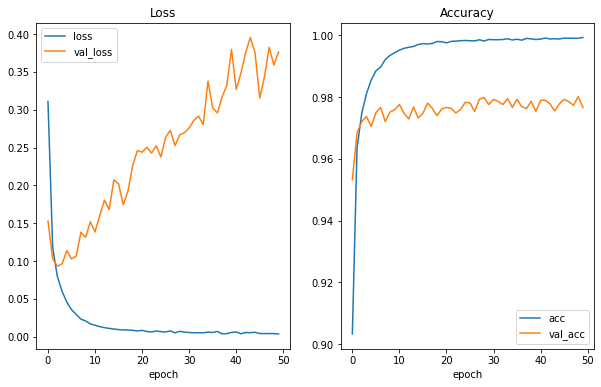

In [41]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

- 미니배치 : 훈련데이터를 일정한 갯수만큼 나누어 훈련시키고 가중치를 업데이트한다 (batch_size=128)
- 검증데이터 : 훈련데이터 중 일부를 검증을 위해 따로 떼어놓고 loss 와 acc 를 별도로 계산한다
    - validation_split
    - validation_data

In [30]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, **kwargs) method of keras.engine.sequential.Sequential instance
    Trains the model for a given number of epochs (iterations on a dataset).
    
    # Arguments
        x: Numpy array of training data (if the model has a single input),
            or list of Numpy arrays (if the model has multiple inputs).
            If input layers in the model are named, you can also pass a
            dictionary mapping input names to Numpy arrays.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data
            (if the model has a single output),
            or list of Numpy arrays (if the model has 

In [43]:
pred_y_train = model.predict(X_train)
pred_y_train.shape

(60000, 10)

In [44]:
(pred_y_train*y_train).sum()/len(y_train) # score of train

0.9946680578718958

In [45]:
pred_y_test = model.predict(X_test)
pred_y_test.shape

(10000, 10)

In [46]:
(pred_y_test*y_test).sum()/len(y_test) # score of test

0.9781464643494854

> **연습문제**
> - 오류가 발생한 이미지를 출력하시오

In [49]:
pred_y_train = model.predict(X_train)

In [51]:
pred_y_train.argmax(axis=1)

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [52]:
y_train.argmax(axis=1)

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [58]:
bad = np.where(pred_y_train.argmax(axis=1) != y_train.argmax(axis=1))[0]
bad

array([ 1021,  5065,  7584,  7784,  8491,  8866,  8952,  9727,  9774,
       10644, 11080, 13508, 14881, 15106, 17908, 20624, 21144, 31070,
       31123, 31562, 32288, 32297, 32323, 33000, 33306, 35051, 35405,
       37145, 39466, 40620, 42758, 43702, 45477, 45586, 45968, 48091,
       48102, 48228, 48258, 48341, 48352, 48431, 48454, 48460, 48486,
       48494, 48524, 48546, 48594, 48614, 48662, 48681, 48786, 48881,
       48930, 48953, 48966, 48975, 48990, 49002, 49006, 49014, 49064,
       49067, 49070, 49164, 49200, 49212, 49217, 49300, 49318, 49324,
       49355, 49464, 49487, 49493, 49498, 49500, 49514, 49515, 49543,
       49549, 49563, 49573, 49599, 49662, 49744, 49842, 49868, 49889,
       49890, 49892, 49893, 49895, 50005, 50218, 50239, 50317, 50320,
       50329, 50340, 50361, 50373, 50391, 50417, 50428, 50446, 50500,
       50514, 50522, 50560, 50574, 50608, 50644, 50676, 50714, 50728,
       50747, 50801, 50819, 50897, 50982, 50994, 51054, 51164, 51180,
       51230, 51248,

C:\Users\user\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

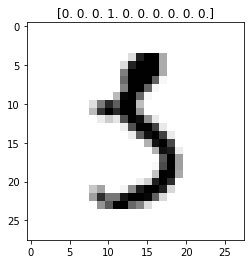

In [63]:
plt.imshow(X_train[7584].reshape(28,28), cmap='gray_r')
plt.title(y_train[7584])

### 모델 저장

In [47]:
model.save('mnist_model_01.h5') # creates a HDF5 file

In [39]:
from keras.models import load_model

model2 = load_model('mnist_model_01.h5')

In [42]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [40]:
model2.predict(X_test)

array([[1.7897082e-18, 1.2604499e-14, 1.4408841e-12, ..., 1.0000000e+00,
        1.5553001e-17, 8.6794649e-10],
       [2.2513420e-24, 1.3519225e-10, 1.0000000e+00, ..., 3.6946021e-16,
        4.7015980e-20, 1.3197994e-25],
       [1.9272220e-10, 9.9997580e-01, 1.7852156e-07, ..., 2.1316106e-05,
        2.4139629e-08, 4.9846496e-09],
       ...,
       [1.1987138e-27, 4.3853409e-23, 5.8669306e-25, ..., 1.4196603e-16,
        3.5619537e-23, 8.0281834e-15],
       [8.6556915e-25, 2.5036305e-26, 1.9347526e-25, ..., 1.2481194e-22,
        1.9484564e-16, 3.3102383e-25],
       [2.1923046e-24, 1.4936362e-32, 1.3257251e-30, ..., 4.9728456e-38,
        1.6158497e-25, 1.5502201e-29]], dtype=float32)

- 가중치 저장 및 로딩

In [ ]:
model.save_weights("mnist_weights_01.h5")
model2.load_weights("mnist_weights_01.h5")

### Flatten
- 출력값을 1차원으로 풀어준다

In [31]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [32]:
X_train = X_train/255
X_test = X_test/255

In [6]:
from tensorflow.keras.layers import Flatten

In [34]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2570      
Total params: 201,866
Trainable params: 201,866
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
model.fit(X_train, np.eye(10)[y_train], epochs=2, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 14s 296us/step - loss: 0.3087 - acc: 0.9046 - val_loss: 0.1806 - val_acc: 0.9437
Epoch 2/2
48000/48000 [==============================] - 13s 270us/step - loss: 0.1212 - acc: 0.9628 - val_loss: 0.1149 - val_acc: 0.9656


In [53]:
pred_y_train = model.predict(X_train)

In [54]:
(pred_y_train.argmax(axis=1)==y_train).mean()

0.9737

### Dropout
- Dropout 은 고의적으로 중간 단계의 출력값 들을 누락시키는 것이다.
- 이렇게 하면 모델이 좀 더 예외상황에 견딜 수 있게 하여, 새로운 데이터에 대한 예측 능력을 키울 수 있다고 알려져 있다.
- 사진의 일부분을 가리거나 시야가 흐릿해 지는 등의 효과와 비슷하다.
- 여러가지 예외사항에 대처가 가능한 강건한 모델을 만들 수 있다.
- 훈련시에는 출력값을 누락시키지만, 검증시에는 모든 출력값을 사용한다. (단 누락비율에 맞게 출력값을 줄여준다)

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
from tensorflow.keras.layers import Dropout

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
history = model.fit(X_train, np.eye(10)[y_train], epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 4s 9ms/step - loss: 0.9604 - acc: 0.6803 - val_loss: 0.2048 - val_acc: 0.9398
Epoch 2/30
375/375 [==============================] - 3s 7ms/step - loss: 0.3312 - acc: 0.9016 - val_loss: 0.1658 - val_acc: 0.9506
Epoch 3/30
375/375 [==============================] - 3s 7ms/step - loss: 0.2688 - acc: 0.9211 - val_loss: 0.1512 - val_acc: 0.9582
Epoch 4/30
375/375 [==============================] - 3s 7ms/step - loss: 0.2392 - acc: 0.9319 - val_loss: 0.1343 - val_acc: 0.9637
Epoch 5/30
375/375 [==============================] - 3s 7ms/step - loss: 0.2234 - acc: 0.9364 - val_loss: 0.1297 - val_acc: 0.9653
Epoch 6/30
375/375 [==============================] - 3s 7ms/step - loss: 0.2070 - acc: 0.9403 - val_loss: 0.1285 - val_acc: 0.9668
Epoch 7/30
375/375 [==============================] - 3s 7ms/step - loss: 0.1906 - acc: 0.9470 - val_loss: 0.1187 - val_acc: 0.9678
Epoch 8/30
375/375 [==============================] - 3s 7ms/step - loss: 0.

In [13]:
pred_y_train = model.predict(X_train)
(pred_y_train.argmax(axis=1)==y_train).mean()

0.98575

In [14]:
pred_y_test = model.predict(X_test)
(pred_y_test.argmax(axis=1)==y_test).mean()

0.9764

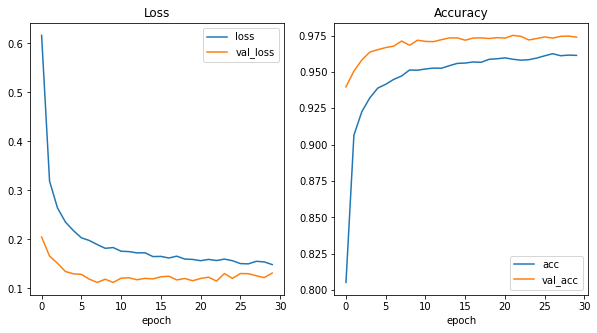

In [15]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

- 훈련데이터는 드랍아웃을 적용했기 때문에 드랍아웃을 적용하지 않은 검증데이터보다 손실이 크다